# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## *Functions*

In [32]:
#Read CSVs
def get_data():
    """
    Get training, validation and test data
    """
    train = pd.read_csv("./PA1_train.csv")
    dev = pd.read_csv("./PA1_dev.csv")
    test = pd.read_csv("./PA1_test.csv")
    return train,dev,test

#Add bias
def add_bias(df):
    """
    Add dummy variable to control intercept
    """
    df["dummy"] = 1
    return df

#Seperate Features from response
def seperate(df_train):
    """
    input: dataframe
    """
    #Grab all continuous features
    x = df_train.iloc[:,0:-1]
    #Split dates
    x = split_date(x)
    x = x.drop(["date"], axis=1)
    #Grab response y
    y = df_train.iloc[:,-1]
    
    return x,y
    
    
#Add new features [Month, Day, Year]
def split_date(df_train):
    """
    splits date into seperate features
    input: dataframe
    """
    print("Splitting date...")
    for i in range(0,len(df_train)):
        df_train.loc[i,"month"] = int(df_train.loc[i,"date"].split("/")[0])
        df_train.loc[i,"day"] = int(df_train.loc[i,"date"].split("/")[1])
        df_train.loc[i,"year"] = int(df_train.loc[i,"date"].split("/")[2])
    print("Done")
    return df_train

#Normalize data
def normalize(df1):
    """
    Normalizes feature matrix
    input: feature df
    """
    print("Normalizing...")
    x = (df1 - np.min(df1))/(np.max(df1) - np.min(df1))
    print("DONE")
    return x

#Linear regression function
def linear_regress(x,y,eta,t,lamb):
    """
    x: input/features
    y: opuput
    eta: learning rate
    t: iterations
    lamb: regularization constant
    """
    print(f'#Learning Rate : {eta}#####')
    
    n = 0
    e = np.zeros(len(y))
    errors = []
    gradient = []
    
    #Initialize weights [w] and predictions [y_hat]
    w = np.zeros(len(x[0]))
    
     
    while n<t:
        #Initialize gradient for each epoch
        gradient_vector = np.zeros(len(x[0]))
                
        #Traverse through each data point   
        for i in range(len(x)):
            #Predicted value
            y_hat = np.dot(w.T,x[i])

            #Error
            e[i] = ((y[i] - y_hat)**2)
            
            
            #Regularization
            if np.dot(w.T,w) == 0:
                r = 0
            else:
                r = (np.dot(w.T,w))**0.5
            
            #Traverse through each feature to update corresponding weights
            for j in range(len(x[0])):
                gradient_vector[j] += ((-2)*(y[i] - y_hat)*x[i,j]) + (2*lamb*r)
        
        
        
        #Update weights
        w -=  eta*gradient_vector
        #Calculate SSE
        errors.append(sum(e))
        #Norm of gradient
        convergence_criteria = np.dot(gradient_vector.T,gradient_vector)**0.5
        gradient.append(convergence_criteria)
        
        ####
        #print(f'#####Iteration : {n+1}#####')
        #print(f'Gradient : {gradient[n]}')

        
        ####
        if (gradient[n]/(10**9)) > 1 and (n+1) <= 6:
            t = 8
        
        n += 1
        if convergence_criteria < 0.5:
            print(f'#Iteration : {n}#####')
            print(f'Gradient : {gradient[n-1]}')
            print()
            print()
            print()
            return w,errors,gradient, n
        if (n) % 50 == 0:
            print(f'#Iteration : {n}#####')
            print(f'Gradient : {gradient[n-1]}')

    print(f'#Iteration : {n}#####')
    print(f'Gradient : {gradient[n-1]}')
    print()
    print()
    print()
    return w,errors,gradient, n

In [10]:
#####DATA PREP#####

#load csv
df_train,df_dev,df_test = get_data()
#Drop ID Feature
df_train = df_train.drop("id", axis=1)

#Grab features and Response
x,y = seperate(df_train)

#Normalize continuous features
x_norm_df = normalize(x)
#Add Bias 
x_norm_df = add_bias(x_norm_df)
x_norm = x_norm_df.values

x_norm_df

Splitting date...
Done
Normalizing...
DONE


,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year
0,1,0.09375,0.275862,0.246849,0.005715,0.4,0.0,0.0,0.50,0.555556,...,0.773913,0.0,0.368687,0.761782,0.394979,0.400000,0.011601,0.545455,0.266667,0.0
1,1,0.03125,0.275862,0.234244,0.002682,0.0,0.0,0.0,1.00,0.444444,...,0.226087,0.0,0.631313,0.683127,0.112971,0.318584,0.004985,0.545455,0.566667,0.0
2,1,0.12500,0.172414,0.134454,0.001471,0.2,0.0,0.0,0.50,0.444444,...,0.017391,0.0,0.722222,0.707093,0.174059,0.226549,0.003837,0.545455,0.200000,0.0
3,1,0.09375,0.172414,0.141807,0.005469,0.0,0.0,0.0,0.75,0.444444,...,0.600000,0.0,0.292929,0.515522,0.300418,0.212389,0.011556,0.272727,0.900000,1.0
4,1,0.15625,0.241379,0.363445,0.006426,0.0,0.0,0.5,1.00,0.555556,...,0.539130,0.0,0.035354,0.690043,0.335565,0.361062,0.011188,0.727273,0.100000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.09375,0.275862,0.231092,0.013111,0.4,0.0,0.0,1.00,0.333333,...,0.504348,0.0,0.292929,0.526621,0.298745,0.353982,0.006746,0.727273,0.833333,0.0
9996,1,0.00000,0.068966,0.044118,0.007566,0.0,0.0,0.0,0.50,0.222222,...,0.365217,0.0,0.843434,0.540454,0.169874,0.138053,0.007440,0.454545,0.100000,0.0
9997,1,0.06250,0.137931,0.122899,0.004200,0.0,0.0,0.0,1.00,0.333333,...,0.530435,0.0,0.777778,0.966061,0.158159,0.304425,0.008033,0.181818,0.533333,1.0
9998,1,0.06250,0.241379,0.157563,0.000804,0.8,0.0,0.0,0.50,0.444444,...,0.939130,0.0,0.515152,0.800708,0.145607,0.217699,0.001188,0.909091,0.566667,0.0


In [ ]:
weights1, sse1, gradient1, iter1 = linear_regress(x_norm, y, 10**0, 50000, 0)
weights2, sse2, gradient2, iter2 = linear_regress(x_norm, y, 10**-1, 50000, 0)
weights3, sse3, gradient3, iter3 = linear_regress(x_norm, y, 10**-2, 50000, 0)
weights4, sse4, gradient4, iter4 = linear_regress(x_norm, y, 10**-3, 50000, 0)
weights5, sse5, gradient5, iter5 = linear_regress(x_norm, y, 10**-4, 50000, 0)
weights6, sse6, gradient6, iter6 = linear_regress(x_norm, y, 10**-5, 50000, 0)
weights7, sse7, gradient7, iter7 = linear_regress(x_norm, y, 10**-6, 50000, 0)
weights8, sse8, gradient8, iter8 = linear_regress(x_norm, y, 10**-7, 50000, 0)


#Learning Rate : 1#####
#Iteration : 8#####
Gradient : 1.4728485766158135e+39



#Learning Rate : 0.1#####
#Iteration : 8#####
Gradient : 1.471497501080645e+32



#Learning Rate : 0.01#####
#Iteration : 8#####
Gradient : 1.4580450660796138e+25



#Learning Rate : 0.001#####
#Iteration : 8#####
Gradient : 1.3292132020270495e+18



#Learning Rate : 0.0001#####
#Iteration : 8#####
Gradient : 48934078876.18481



#Learning Rate : 1e-05#####
#Iteration : 50#####
Gradient : 6931.20716643508
#Iteration : 100#####
Gradient : 4297.097785341487
#Iteration : 150#####
Gradient : 2835.618999190176
#Iteration : 200#####
Gradient : 2003.9743945757536
#Iteration : 250#####
Gradient : 1519.2381546069696
#Iteration : 300#####
Gradient : 1223.944165967497
#Iteration : 350#####
Gradient : 1031.5591939451122
#Iteration : 400#####
Gradient : 896.3730142107407
#Iteration : 450#####
Gradient : 794.8011907727905
#Iteration : 500#####
Gradient : 714.5169229935811
#Iteration : 550#####
Gradient : 648.75594831367

#Iteration : 7500#####
Gradient : 49.98768074426886
#Iteration : 7550#####
Gradient : 49.72884062637432
#Iteration : 7600#####
Gradient : 49.47163666968831
#Iteration : 7650#####
Gradient : 49.216047016075514
#Iteration : 7700#####
Gradient : 48.96205061793937
#Iteration : 7750#####
Gradient : 48.709627194956624
#Iteration : 7800#####
Gradient : 48.45875719336433
#Iteration : 7850#####
Gradient : 48.20942174762748
#Iteration : 7900#####
Gradient : 47.961602644354265
#Iteration : 7950#####
Gradient : 47.7152822883051
#Iteration : 8000#####
Gradient : 47.47044367038217
#Iteration : 8050#####
Gradient : 47.22707033746439
#Iteration : 8100#####
Gradient : 46.98514636398575
#Iteration : 8150#####
Gradient : 46.74465632514327
#Iteration : 8200#####
Gradient : 46.50558527164006
#Iteration : 8250#####
Gradient : 46.26791870586725
#Iteration : 8300#####
Gradient : 46.031642559439845
#Iteration : 8350#####
Gradient : 45.796743172003666
#Iteration : 8400#####
Gradient : 45.56320727123719
#Iterati

#Iteration : 15250#####
Gradient : 23.106300722110795
#Iteration : 15300#####
Gradient : 22.995486758739457
#Iteration : 15350#####
Gradient : 22.885262062685353
#Iteration : 15400#####
Gradient : 22.77562353298336
#Iteration : 15450#####
Gradient : 22.66656808534696
#Iteration : 15500#####
Gradient : 22.55809265205591
#Iteration : 15550#####
Gradient : 22.450194181845355
#Iteration : 15600#####
Gradient : 22.342869639797435
#Iteration : 15650#####
Gradient : 22.236116007231015
#Iteration : 15700#####
Gradient : 22.129930281597108
#Iteration : 15750#####
Gradient : 22.024309476372153
#Iteration : 15800#####
Gradient : 21.919250620954042
#Iteration : 15850#####
Gradient : 21.814750760559818
#Iteration : 15900#####
Gradient : 21.710806956123538
#Iteration : 15950#####
Gradient : 21.607416284195914
#Iteration : 16000#####
Gradient : 21.5045758368454
#Iteration : 16050#####
Gradient : 21.402282721559253
#Iteration : 16100#####
Gradient : 21.300534061147292
#Iteration : 16150#####
Gradient 

#Iteration : 22900#####
Gradient : 11.496931615884527
#Iteration : 22950#####
Gradient : 11.448107688040519
#Iteration : 23000#####
Gradient : 11.399545292746545
#Iteration : 23050#####
Gradient : 11.351243020678785
#Iteration : 23100#####
Gradient : 11.303199469603044
#Iteration : 23150#####
Gradient : 11.255413244337714
#Iteration : 23200#####
Gradient : 11.207882956717022
#Iteration : 23250#####
Gradient : 11.160607225555971
#Iteration : 23300#####
Gradient : 11.11358467661383
#Iteration : 23350#####
Gradient : 11.066813942559333
#Iteration : 23400#####
Gradient : 11.02029366293477
#Iteration : 23450#####
Gradient : 10.974022484120802
#Iteration : 23500#####
Gradient : 10.927999059301902
#Iteration : 23550#####
Gradient : 10.882222048431482
#Iteration : 23600#####
Gradient : 10.836690118197632
#Iteration : 23650#####
Gradient : 10.791401941988443
#Iteration : 23700#####
Gradient : 10.746356199857887
#Iteration : 23750#####
Gradient : 10.701551578492678
#Iteration : 23800#####
Gradie

In [27]:
sse1

[417729.13677477534,
 1441711259931547.5,
 6.794374698184466e+24,
 3.202181295174746e+34,
 1.5091845552447712e+44,
 7.112770364740612e+53,
 3.352240922803048e+63,
 1.579907494303781e+73]

In [60]:
#x_norm_df

Text(0, 0.5, 'SSE')

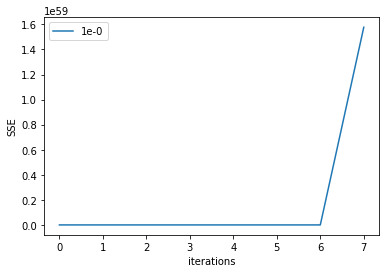

In [8]:
plt.plot(sse)
plt.legend(['1e-0'])
plt.xlabel('iterations')
plt.ylabel('SSE')